<a href="https://colab.research.google.com/github/NazmulHassan033/Nazmul-Hassan/blob/main/Pd_data_Using_Recursive_Frequent_Elimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
data_set = pd.read_csv(url)
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=5)


In [ ]:
X = data_set.drop(['name', 'status'], axis=1)
y = data_set['status']
#rfe.fit(X, y)


LogisticRegression: 79.49%
KNeighborsClassifier: 92.31%
SVC: 92.31%
RandomForestClassifier: 92.31%
XGBClassifier: 94.87%
AdaBoostClassifier: 89.74%


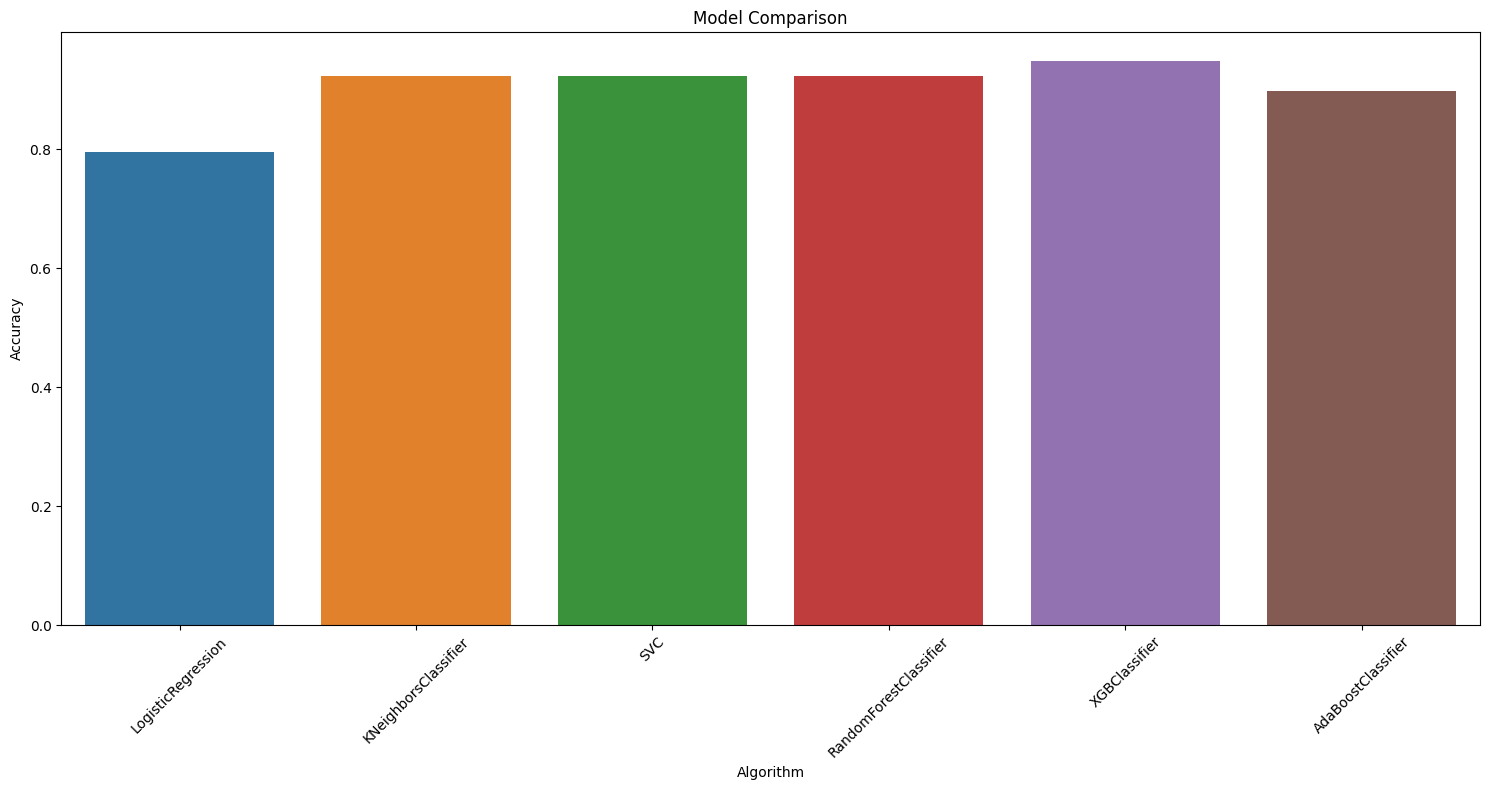

ERROR:__main__:Traceback (most recent call last):
  File "<ipython-input-33-e6af6bd200e2>", line 96, in feature_selection
    return significant_list
UnboundLocalError: local variable 'significant_list' referenced before assignment



Selected features by RFE: [('MDVP:Shimmer(dB)', 1)]
Selected features by SelectKBest: []
The XGBClassifier algorithm has the maximum accuracy of 94.87%


In [ ]:
import logging
import xgboost
import traceback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_classif
from pandas.api.types import is_string_dtype
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

LOGGER = logging.getLogger(__name__)

class Model:
    def feature_selection(self, df, target, feature_type):
        LOGGER.info('Feature Automation Method - Starts')
        try:
            df = df.fillna(0)
            le = LabelEncoder()
            y = df[target]
            label_encoder = {}
            df.drop(target, axis=1, inplace=True)
            str_type = is_string_dtype(y)
            y = le.fit_transform(y)

            for i in df.columns:
                    # To deselect column having unique values
                    unique_col_length = len(pd.unique(df[i]))
                    total_length = len(df[i])
                    percentage = int((unique_col_length/total_length)*100)
                    if df[i].is_unique or len(pd.unique(df[i])) == 1 or percentage > 80:
                        df.drop(i, axis=1, inplace=True)

                # Applying Label Encoding to categorical columns
            for col in df.columns.values:
                  if df[col].dtype not in ['float64', 'int32']:
                      label_encoder[col] = LabelEncoder()
                      df[col] = df[col].astype(str)
                      label_encoder[col] = label_encoder[col].fit(df[col])
                      df[col] = label_encoder[col].transform(df[col].astype(str))

                # Feature selection with Select K Best
            if feature_type == "SelectKBest":
                if str_type:
                      # For classification type
                      lr = f_classif
                else:
                        # For Regression type
                      lr = f_regression

                kbest = SelectKBest(score_func=lr, k=1).fit(df, y)
                rank_dic = {}
                for i, k in enumerate(df.columns.values):
                    rank_dic[k] = kbest.scores_[i]

                # Feature selection with RFE
            else:
                if str_type:
                    # For classification type
                    lr = DecisionTreeClassifier()
                else:
                      # For Regression type
                    lr = DecisionTreeRegressor()
                rfe = RFE(lr, n_features_to_select=1)
                rfe.fit(df, y)
                rank_dict = {}

                for i, k in enumerate(df.columns.values):
                    rank_dict[k] = rfe.ranking_[i]

                sorted_dict = sorted(rank_dict.items(), key=lambda x: x[1])
                rank_dict = dict(sorted(rank_dict.items(), key=lambda x: x[1]))


                significant_list = []
                if feature_type == 'RFE':
                    length = int(len(rank_dict) * 0.6)
                    for i in range(0, length):
                        significant_list.append(sorted_dict[i])


                elif feature_type == 'SelectKBest':
                    length = int(len(rank_dict) * 0.6)
                    for i in range(0, length):
                        significant_list.append(dict_list[i])
            # ... Rest of your feature selection logic ...

            LOGGER.info('Feature Automation Method - Ends')
            return significant_list

        except Exception:
            LOGGER.error(traceback.format_exc())
            return []

    def model_training(self):
        LOGGER.info('Model Training  Method - Starts')
        try:
            dataframe = pd.read_csv('parkinsons.csv')

            # ... Rest of your data preprocessing ...

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            # Model Training starts
            model_dict = {
                'LogisticRegression': LogisticRegression(),
                'KNeighborsClassifier': KNeighborsClassifier(),
                'SVC': SVC(),
                'RandomForestClassifier': RandomForestClassifier(),
                'XGBClassifier': xgboost.XGBClassifier(),
                'AdaBoostClassifier': AdaBoostClassifier()
            }

            results = {}
            for model_name, classifier in model_dict.items():
                model = classifier
                model.fit(X_train, y_train)
                prediction = model.predict(X_test)
                score = accuracy_score(y_test, prediction)
                results[model_name] = score
                print(f'{model_name}: {score*100:.2f}%')

            # Visualizing the accuracies in a bar chart
            plt.figure(figsize=(15, 8))
            sns.barplot(x=list(results.keys()), y=list(results.values()))
            plt.xlabel('Algorithm')
            plt.ylabel('Accuracy')
            plt.title('Model Comparison')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            best_algorithm = max(results, key=results.get)
            max_accuracy = results[best_algorithm]

            LOGGER.info('Model Training Method - Ends')
            return best_algorithm, max_accuracy

        except Exception:
            LOGGER.error(traceback.format_exc())
            return 'Failure', 0.0

obj = Model()
best_algorithm, max_accuracy = obj.model_training()
target = 'status'
#For RFE feature selection
significant_attributes_rfe = obj.feature_selection(data_set, target, 'RFE')
print("Selected features by RFE:", significant_attributes_rfe)

# For SelectKBest feature selection
significant_attributes_kbest = obj.feature_selection(data_set, target, 'SelectKBest')
print("Selected features by SelectKBest:", significant_attributes_kbest)

print(f"The {best_algorithm} algorithm has the maximum accuracy of {max_accuracy*100:.2f}%")


In [ ]:
print(rfe.ranking_)


NameError: ignored

In [ ]:
selected_features = X.columns[rfe.support_]
print(selected_features)


Index(['MDVP:Shimmer(dB)', 'DFA', 'spread1', 'spread2', 'D2'], dtype='object')


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import seaborn as sn
#selected_features = ['tqwt_entropy_log_dec_5', 'tqwt_entropy_log_dec_12',
 #      'tqwt_entropy_log_dec_13', 'tqwt_entropy_log_dec_15',
  #     'tqwt_entropy_log_dec_16','class']

selected_features = ['MDVP:Shimmer(dB)', 'DFA', 'spread1', 'spread2', 'D2']
# Create a new dataset with the selected features
new_df = data_set[selected_features]

# Save the new dataset to a CSV file
new_df.to_csv('parkinsons_selected.csv', index=False)


In [ ]:
new_df = pd.read_csv('parkinsons_selected.csv')
from sklearn.model_selection import train_test_split
#new_df.info()
new_df.head


<bound method NDFrame.head of      MDVP:Shimmer(dB)       DFA   spread1   spread2        D2
0               0.426  0.815285 -4.813031  0.266482  2.301442
1               0.626  0.819521 -4.075192  0.335590  2.486855
2               0.482  0.825288 -4.443179  0.311173  2.342259
3               0.517  0.819235 -4.117501  0.334147  2.405554
4               0.584  0.823484 -3.747787  0.234513  2.332180
..                ...       ...       ...       ...       ...
190             0.405  0.657899 -6.538586  0.121952  2.657476
191             0.263  0.683244 -6.195325  0.129303  2.784312
192             0.256  0.655683 -6.787197  0.158453  2.679772
193             0.241  0.643956 -6.744577  0.207454  2.138608
194             0.190  0.664357 -5.724056  0.190667  2.555477

[195 rows x 5 columns]>

#Logistic Regression -->Need to Optimize


In [ ]:
# Split dataset into input features and target variable
X_new = new_df

#y = new_df["class"]


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

clf = LogisticRegression()

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(X_test)
print(y_pred)

     MDVP:Shimmer(dB)       DFA   spread1   spread2        D2
138             0.517  0.701404 -5.634576  0.306014  2.419253
16              0.192  0.644692 -5.440040  0.239764  2.264501
155             0.276  0.652025 -3.583722  0.207914  2.439597
96              0.307  0.693429 -6.417440  0.194627  2.473239
68              0.478  0.731444 -5.869750  0.151814  2.118496
153             0.241  0.670475 -4.865194  0.246404  2.013530
55              0.307  0.811843 -4.333543  0.221727  2.014606
15              0.126  0.658245 -5.340115  0.210185  2.205546
112             0.210  0.722085 -4.876336  0.212054  2.376749
111             0.155  0.712466 -6.471427  0.184378  2.502336
184             0.163  0.656516 -5.198864  0.206768  2.120412
18              0.542  0.719467 -3.949079  0.357870  3.109010
82              0.216  0.787896 -5.022288  0.146948  2.428306
9               0.255  0.798463 -5.011879  0.325996  2.432792
164             0.272  0.674562 -2.929379  0.396746  2.560422
117     

<Axes: xlabel='Predicted', ylabel='Actual'>

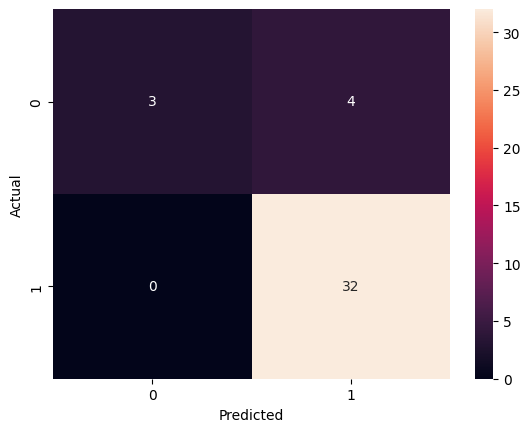

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the target variable on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print the confusion matrix
print(f'True positives: {tp}')
print(f'False positives: {fp}')
print(f'True negatives: {tn}')
print(f'False negatives: {fn}')

True positives: 32
False positives: 4
True negatives: 3
False negatives: 0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 score: {f1:.3f}')
print(f'AUC-ROC score: {auc_roc:.3f}')

Accuracy: 0.897
Precision: 0.889
Recall: 1.000
F1 score: 0.941
AUC-ROC score: 0.714


### RANDOM FOREST

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
new_df = pd.read_csv('parkinsons_selected.csv')
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into input features and target variable
X_new = new_df

#y_new = new_df['class']


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

clf = LogisticRegression()

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(X_test)
print(y_pred)

     MDVP:Shimmer(dB)       DFA   spread1   spread2        D2
138             0.517  0.701404 -5.634576  0.306014  2.419253
16              0.192  0.644692 -5.440040  0.239764  2.264501
155             0.276  0.652025 -3.583722  0.207914  2.439597
96              0.307  0.693429 -6.417440  0.194627  2.473239
68              0.478  0.731444 -5.869750  0.151814  2.118496
153             0.241  0.670475 -4.865194  0.246404  2.013530
55              0.307  0.811843 -4.333543  0.221727  2.014606
15              0.126  0.658245 -5.340115  0.210185  2.205546
112             0.210  0.722085 -4.876336  0.212054  2.376749
111             0.155  0.712466 -6.471427  0.184378  2.502336
184             0.163  0.656516 -5.198864  0.206768  2.120412
18              0.542  0.719467 -3.949079  0.357870  3.109010
82              0.216  0.787896 -5.022288  0.146948  2.428306
9               0.255  0.798463 -5.011879  0.325996  2.432792
164             0.272  0.674562 -2.929379  0.396746  2.560422
117     

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into input features and target variable
#X = new_df.drop('class', axis=1)
#y = new_df['class']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(X_test)
print(y_pred)

     MDVP:Shimmer(dB)       DFA   spread1   spread2        D2
138             0.517  0.701404 -5.634576  0.306014  2.419253
16              0.192  0.644692 -5.440040  0.239764  2.264501
155             0.276  0.652025 -3.583722  0.207914  2.439597
96              0.307  0.693429 -6.417440  0.194627  2.473239
68              0.478  0.731444 -5.869750  0.151814  2.118496
153             0.241  0.670475 -4.865194  0.246404  2.013530
55              0.307  0.811843 -4.333543  0.221727  2.014606
15              0.126  0.658245 -5.340115  0.210185  2.205546
112             0.210  0.722085 -4.876336  0.212054  2.376749
111             0.155  0.712466 -6.471427  0.184378  2.502336
184             0.163  0.656516 -5.198864  0.206768  2.120412
18              0.542  0.719467 -3.949079  0.357870  3.109010
82              0.216  0.787896 -5.022288  0.146948  2.428306
9               0.255  0.798463 -5.011879  0.325996  2.432792
164             0.272  0.674562 -2.929379  0.396746  2.560422
117     

<Axes: xlabel='Predicted', ylabel='Actual'>

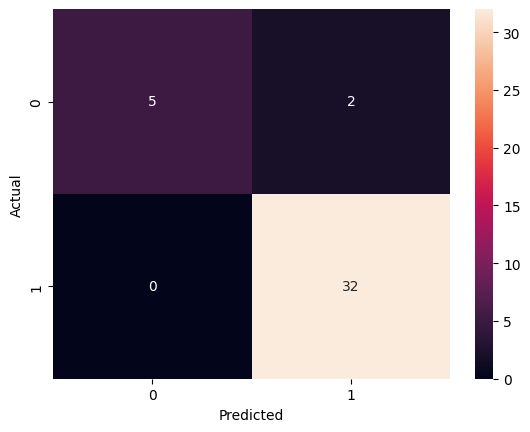

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the target variable on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print the confusion matrix
print(f'True positives: {tp}')
print(f'False positives: {fp}')
print(f'True negatives: {tn}')
print(f'False negatives: {fn}')

True positives: 32
False positives: 2
True negatives: 5
False negatives: 0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 score: {f1:.3f}')
print(f'AUC-ROC score: {auc_roc:.3f}')

Accuracy: 0.949
Precision: 0.941
Recall: 1.000
F1 score: 0.970
AUC-ROC score: 0.857


###KNN

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
selected_features = ['MDVP:Shimmer(dB)', 'status', 'spread1', 'spread2', 'D2']

# Create a new dataset with the selected features
new_df = data_set[selected_features]

# Save the new dataset to a CSV file
new_df.to_csv('parkinsons_selected.csv', index=False)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import seaborn as sn

#X = new_data[['MDVP:Fo(Hz)','spread1','DFA','RPDE']]
X =new_df[['MDVP:Shimmer(dB)', 'status', 'spread1', 'spread2', 'D2']]
y = new_df['status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(X_test)
print(y_pred)


     MDVP:Shimmer(dB)  status   spread1   spread2        D2
83              0.202       1 -6.025367  0.078202  2.053601
12              0.112       1 -6.547148  0.152813  2.041277
33              0.085       0 -7.695734  0.178540  1.544609
113             0.149       1 -5.963040  0.250283  2.489191
171             0.129       0 -6.323531  0.218885  2.193412
134             0.441       1 -5.301321  0.320385  2.375138
163             0.155       1 -5.617124  0.184896  1.871871
124             0.224       1 -5.944191  0.143359  1.929715
74              0.216       1 -5.313360  0.201861  2.225815
18              0.542       1 -3.949079  0.357870  3.109010
7               0.134       1 -6.167603  0.183721  2.064693
5               0.456       1 -4.242867  0.299111  2.187560
125             0.233       1 -5.594275  0.127950  1.765957
161             0.325       1 -5.283009  0.226528  2.442906
170             0.181       0 -7.304500  0.171088  2.095237
181             0.163       1 -5.704053 

<Axes: xlabel='Predicted', ylabel='Actual'>

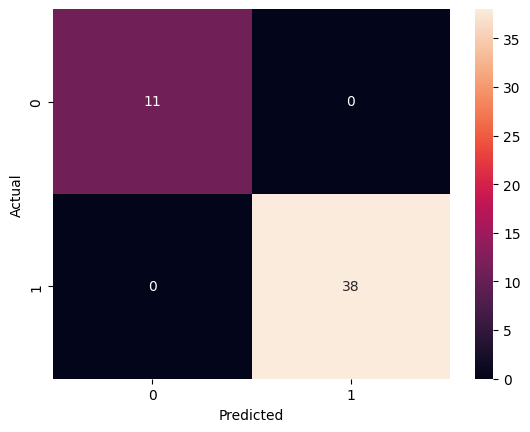

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Predict the target variable on the test set
y_pred = knn.predict(X_test)

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print the confusion matrix
print(f'True positives: {tp}')
print(f'False positives: {fp}')
print(f'True negatives: {tn}')
print(f'False negatives: {fn}')

True positives: 38
False positives: 0
True negatives: 11
False negatives: 0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 score: {f1:.3f}')
print(f'AUC-ROC score: {auc_roc:.3f}')

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 score: 1.000
AUC-ROC score: 1.000


### XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
import seaborn as sn
selected_features = ['MDVP:Shimmer(dB)', 'status', 'spread1', 'spread2', 'D2']

# Create a new dataset with the selected features
new_df = data_set[selected_features]

# Save the new dataset to a CSV file
new_df.to_csv('parkinsons_selected.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into input features and target variable
X = new_df.drop('status', axis=1)
y = new_df['status']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_xgb = XGBClassifier()

clf_xgb.fit(X_train,y_train)

y_pred=clf_xgb.predict(X_test)

print(X_test)
print(y_pred)

     MDVP:Shimmer(dB)   spread1   spread2        D2
138             0.517 -5.634576  0.306014  2.419253
16              0.192 -5.440040  0.239764  2.264501
155             0.276 -3.583722  0.207914  2.439597
96              0.307 -6.417440  0.194627  2.473239
68              0.478 -5.869750  0.151814  2.118496
153             0.241 -4.865194  0.246404  2.013530
55              0.307 -4.333543  0.221727  2.014606
15              0.126 -5.340115  0.210185  2.205546
112             0.210 -4.876336  0.212054  2.376749
111             0.155 -6.471427  0.184378  2.502336
184             0.163 -5.198864  0.206768  2.120412
18              0.542 -3.949079  0.357870  3.109010
82              0.216 -5.022288  0.146948  2.428306
9               0.255 -5.011879  0.325996  2.432792
164             0.272 -2.929379  0.396746  2.560422
117             0.175 -4.597834  0.372114  2.975889
69              0.497 -6.261141  0.120956  2.137075
113             0.149 -5.963040  0.250283  2.489191
192         

<Axes: xlabel='Predicted', ylabel='Actual'>

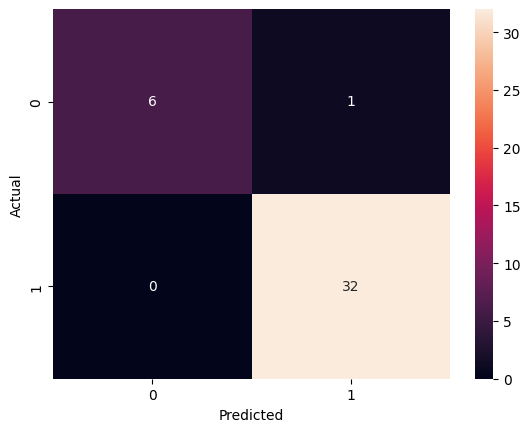

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the target variable on the test set
y_pred = clf_xgb.predict(X_test)

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print the confusion matrix
print(f'True positives: {tp}')
print(f'False positives: {fp}')
print(f'True negatives: {tn}')
print(f'False negatives: {fn}')

True positives: 32
False positives: 1
True negatives: 6
False negatives: 0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 score: {f1:.3f}')
print(f'AUC-ROC score: {auc_roc:.3f}')

Accuracy: 0.974
Precision: 0.970
Recall: 1.000
F1 score: 0.985
AUC-ROC score: 0.929


Accuracy: 0.974
Precision: 0.970
Recall: 1.000
F1 score: 0.985
AUC-ROC score: 0.929


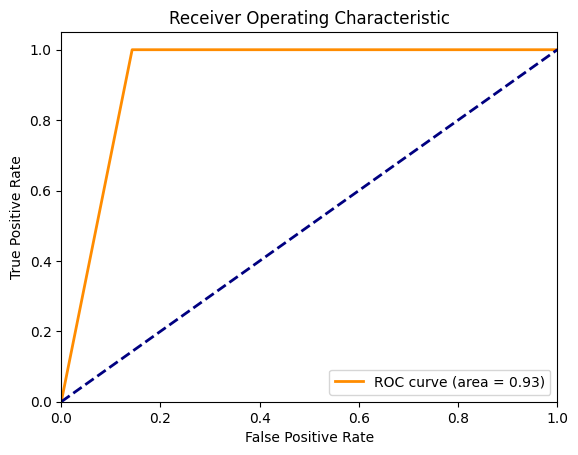

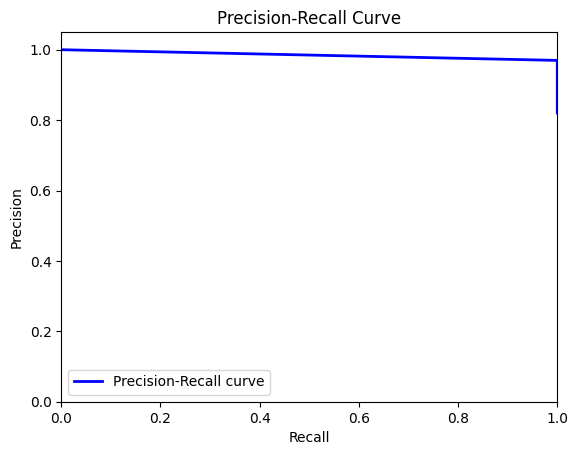

Confusion Matrix:
[[ 6  1]
 [ 0 32]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix

# Assuming you have already trained your model and obtained y_pred and y_test
# y_pred and y_test should be arrays with predicted and actual labels, respectively

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 score: {f1:.3f}')

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC-ROC score: {roc_auc:.3f}')

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
